import modules

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
mpl.style.use('bmh')
import seaborn as sns
from google.colab import drive

import and read dataset

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/My Drive/Final Requirements Datasets/Dengue Cases.csv')

In [4]:
df

,Month,Year,Region,Dengue_Cases
0,Jan,2008,Region.I,2.953926
1,Feb,2008,Region.I,2.183336
2,Mar,2008,Region.I,0.972410
3,Apr,2008,Region.I,9.357156
4,May,2008,Region.I,7.320599
...,...,...,...,...
1831,Aug,2016,NCR,10.126983
1832,Sep,2016,NCR,9.900541
1833,Oct,2016,NCR,8.460119
1834,Nov,2016,NCR,7.541772


set values needed for visualization

In [5]:
# add data column and set as index
df['date'] = pd.to_datetime(df['Month'] + " " + df['Year'].astype(str))
df['date'] = df['date'].dt.strftime('%B %Y')
df_region = df.pivot(index='date', columns='Region', values='Dengue_Cases')
df_region.index = sorted(pd.to_datetime(df_region.index))
df_region

Region,ARMM,CAR,CARAGA,NCR,Region.I,Region.II,Region.III,Region.IV.A,Region.IV.B,Region.IX,Region.V,Region.VI,Region.VII,Region.VIII,Region.X,Region.XI,Region.XII
2008-01-01,0.999862,6.640401,5.113832,21.641057,9.357156,13.733265,16.054144,12.302083,3.454186,2.222252,3.074057,4.931357,13.099457,2.777825,5.624256,4.975168,5.132956
2008-02-01,1.439904,7.588593,12.580929,3.699726,3.051313,4.075385,4.238796,3.519148,5.573404,6.110927,1.300038,5.056308,8.431712,8.771474,6.192632,7.677687,8.844575
2008-03-01,0.708386,1.296299,1.478580,3.473876,0.657307,1.397002,1.727179,1.375134,0.180787,5.127933,1.598941,2.233394,4.287728,0.871923,1.142465,3.612947,2.376977
2008-04-01,0.580710,3.468524,1.826589,4.099413,5.400020,12.368304,3.609517,2.157078,1.185621,2.176033,1.548709,2.894018,4.610279,0.872264,2.659810,4.308025,5.005067
2008-05-01,3.609895,7.124301,32.239551,0.919149,5.792751,4.380564,2.849495,2.241570,4.664704,17.628651,1.451903,11.878028,7.294059,6.734971,20.671557,16.808233,15.928404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-01,4.912198,67.480175,10.813059,10.291784,12.101177,16.821367,6.715568,15.073659,10.524738,19.068518,9.044643,76.156491,26.841364,29.985633,28.041095,39.230981,40.600322
2016-09-01,0.741606,83.053814,10.635802,25.228490,76.658112,72.928739,23.104030,31.280204,25.579415,7.598066,11.658935,45.369956,41.054012,6.160423,6.922538,19.693360,27.913205
2016-10-01,5.549343,58.404976,22.762241,17.990044,24.268373,11.869117,24.898496,20.345609,13.118598,13.443722,8.752294,70.017357,68.099450,7.984009,41.967899,18.127205,41.881446
2016-11-01,0.565710,8.456886,4.404164,19.953575,4.878145,10.369663,9.160351,10.422332,1.360453,2.038295,3.876032,9.693714,17.788376,5.596803,5.017990,4.052151,3.529770


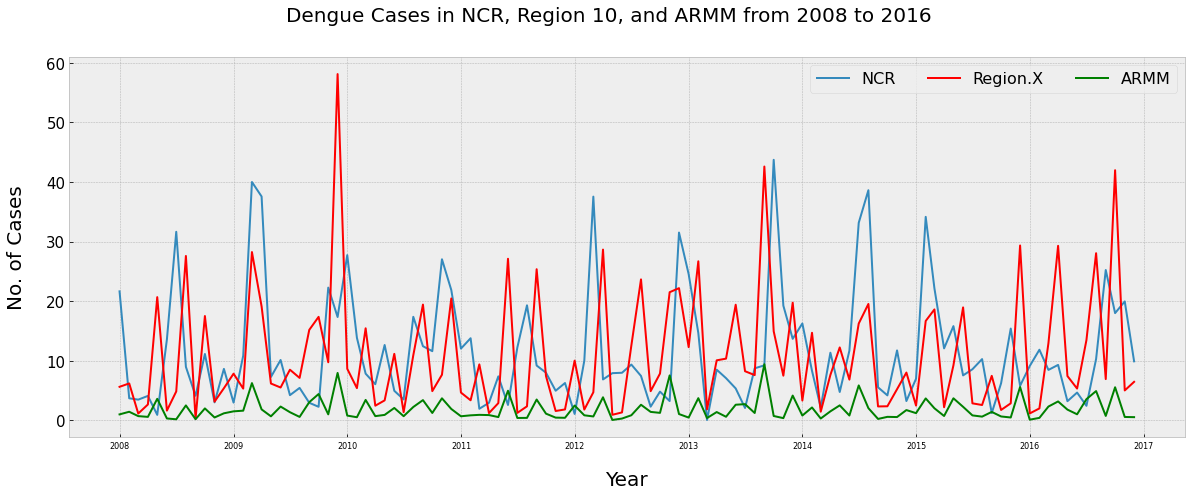

In [13]:
# create line graph
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(df_region.index, df_region['NCR'])
ax.plot(df_region.index, df_region['Region.X'], color='red')
ax.plot(df_region.index, df_region['ARMM'], color='green')
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
ax.legend(['NCR', 'Region.X', 'ARMM'], loc='upper right', prop={'size': 16}, ncol = 3)
ax.set_xlabel('Year', fontsize=20, labelpad=20)
ax.set_ylabel('No. of Cases', fontsize=20, labelpad=20)
fig.suptitle('Dengue Cases in NCR, Region 10, and ARMM from 2008 to 2016', fontsize=20)
matplotlib.rc('xtick', labelsize=17) 
matplotlib.rc('ytick', labelsize=15)
fig.show()

In [7]:
# get regions and number of cases in december 2016
df_2016 = df_region.loc['2016-12-01'].sort_values()
df_2016

Region
ARMM            0.535508
Region.IV.B     1.284668
Region.VIII     1.997515
Region.V        2.008349
Region.IX       3.721431
Region.VI       4.792577
CAR             6.397080
Region.X        6.460124
Region.IV.A     7.585835
Region.II       7.697590
Region.I        8.235022
Region.XI       9.832420
NCR             9.900541
Region.XII      9.925956
Region.VII     10.293869
CARAGA         11.229401
Region.III     14.512800
Name: 2016-12-01 00:00:00, dtype: float64

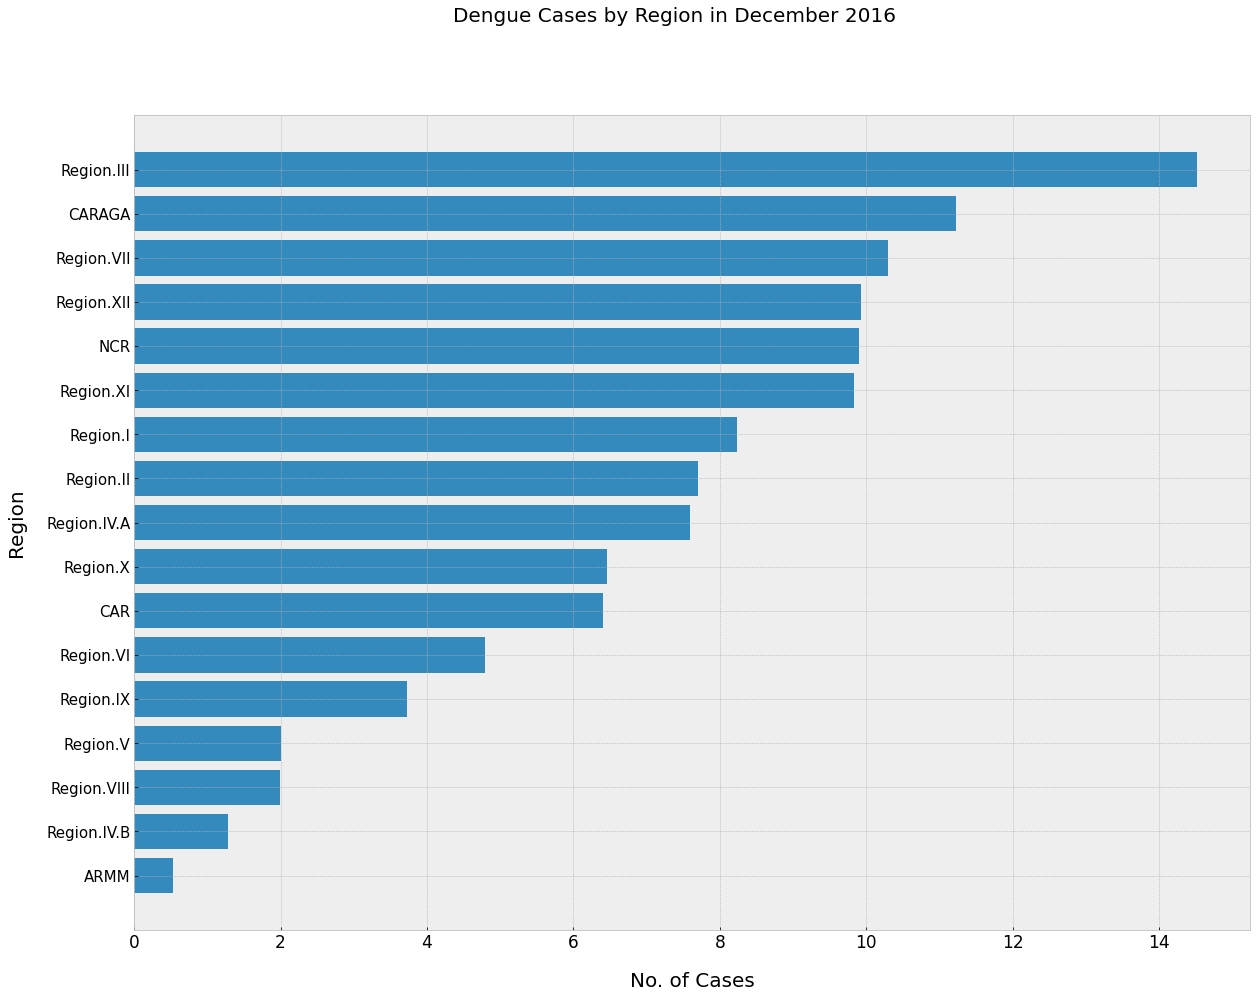

In [8]:
# create bar chart
fig, ax = plt.subplots(figsize=(20,15))
ax.barh(df_2016.index, df_2016, align='center')
ax.set_xlabel('No. of Cases', fontsize=20, labelpad=20)
ax.set_ylabel('Region', fontsize=20, labelpad=20)
fig.suptitle('Dengue Cases by Region in December 2016', fontsize=20)
fig.show()